# **Exploratory Data Analysis(EDA) with Haberman’s survival dataset**

#The objective of this analysis is To find patterns within the dataset to gain further understanding of the data and leverage it to choose a machine learning algorithm for predicting the survival rates of patients who undergo the surgery.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd "/content/drive/MyDrive/Data Science Projects/EDA"

/content/drive/MyDrive/Data Science Projects/EDA


In [ ]:
pwd

'/content/drive/MyDrive/Data Science Projects/EDA'

In [ ]:
import pandas as pd

df = pd.read_csv("haberman.csv")
df.shape

(305, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   30      305 non-null    int64
 1   64      305 non-null    int64
 2   1       305 non-null    int64
 3   1.1     305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
#Data attributes:-

# Age of patient at the time of operation (numerical)
# Patient’s year of operation (year — 1900, numerical)
# Number of positive axillary nodes detected (numerical)
# Survival status (class attribute) 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year

In [ ]:
df.columns = ["age",'year','nodes','status']

In [ ]:
df.head()

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
df.describe()   #Mean,Std,Interquartiles,Min,Max and so on

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
print(df["status"].value_counts())
print(df['year'].value_counts())

status
1    224
2     81
Name: count, dtype: int64
year
58    36
64    30
63    30
65    28
60    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: count, dtype: int64


# **Univariate Analysis**

In [ ]:
#use only one variable(simplest form of analyzing data)

#use Probability Density Function, Cumulative Distribution Function, Box Plots, and Violin Plots for our analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#KDE plots are a powerful tool for visualizing the distribution of continuous data.
#They provide a smooth, continuous estimate of the data density, making them useful for understanding the underlying shape and comparing distributions across different groups.



## **KDE(Kernel Density Estimate) Plot for Age**

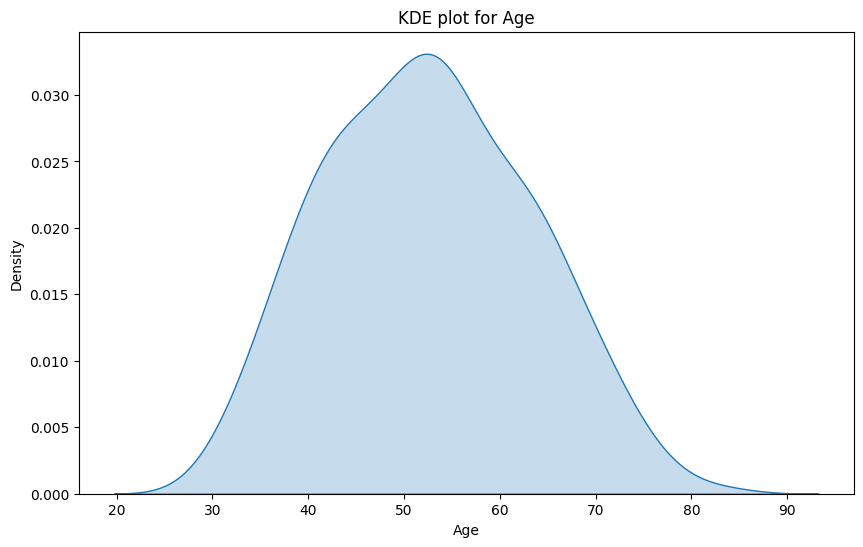

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['age'],fill=True)
plt.title("KDE plot for Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

## **CDF(Cumulative Distribution Function) Plot for Age**

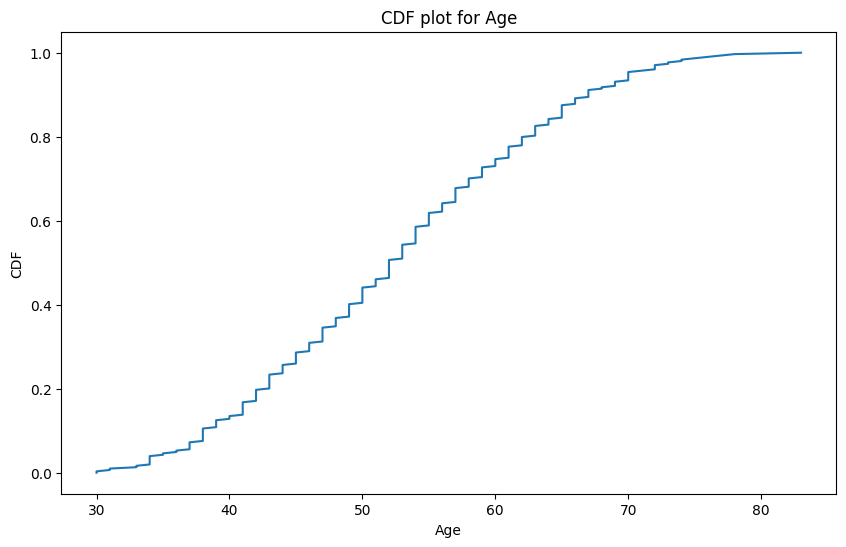

In [ ]:
plt.figure(figsize=(10,6))
sorted_age = np.sort(df['age'])
yvals = np.arange(len(sorted_age))/float(len(sorted_age)-1)
plt.plot(sorted_age,yvals)
plt.title("CDF plot for Age")
plt.xlabel("Age")
plt.ylabel("CDF")
plt.show()

#For example, if you look at a point where the x-coordinate (age) is 40:
#The y-coordinate (CDF value) at that point tells you the proportion of individuals in your dataset whose age is less than or equal to 40.
#If the y-coordinate is 0.6, it means that 60% of the individuals in your dataset are aged 30 or younger

## **Histogram for Number of Nodes**

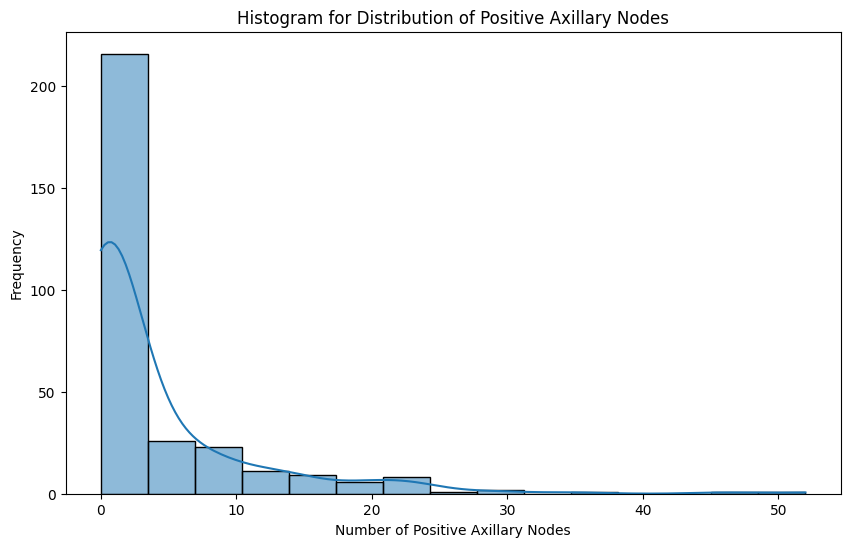

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['nodes'],bins=15,kde=True)
plt.title("Histogram for Distribution of Positive Axillary Nodes")
plt.xlabel("Number of Positive Axillary Nodes")
plt.ylabel("Frequency")
plt.show()

## **Count Plot for Survival Status**

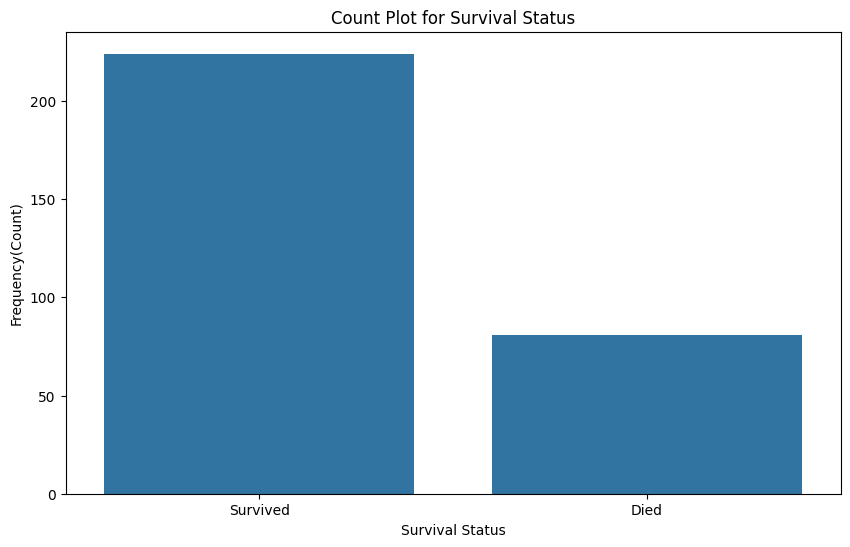

In [ ]:
df['status'] = df['status'].astype('category')

plt.figure(figsize=(10,6))
sns.countplot(x='status', data=df)
plt.title("Count Plot for Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Frequency(Count)")

#set custom x-axis tick labels
plt.xticks([0,1],["Survived","Died"],rotation=0)

plt.show()

# **Bivariate Analysis**

In [ ]:
#Aim is to find underlying patterns/relationships using two attributes
#scatter plot


## **Scatter Plot of Age vs. Nodes with Survival Status Hue**

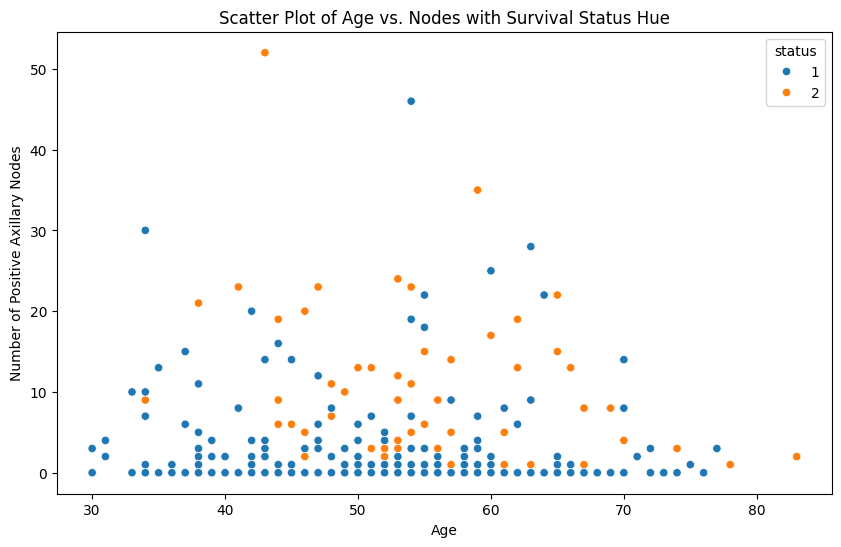

In [ ]:
df["status"] = df["status"].astype("category")

plt.figure(figsize=(10,6))
sns.scatterplot(x="age",y="nodes",hue="status",data=df)
plt.title("Scatter Plot of Age vs. Nodes with Survival Status Hue")
plt.xlabel("Age")
plt.ylabel("Number of Positive Axillary Nodes")
plt.show()

In [ ]:
#This scatter plot suggests that while age does not provide a clear distinction between the two survival statuses, the number of positive axillary nodes is a more significant factor.
#Individuals with fewer positive axillary nodes tend to have a better survival rate, while those with more nodes are more likely to die within 5 years.

##**Scatter Plot of Age vs. Year of Operation with Survival Status Hue**

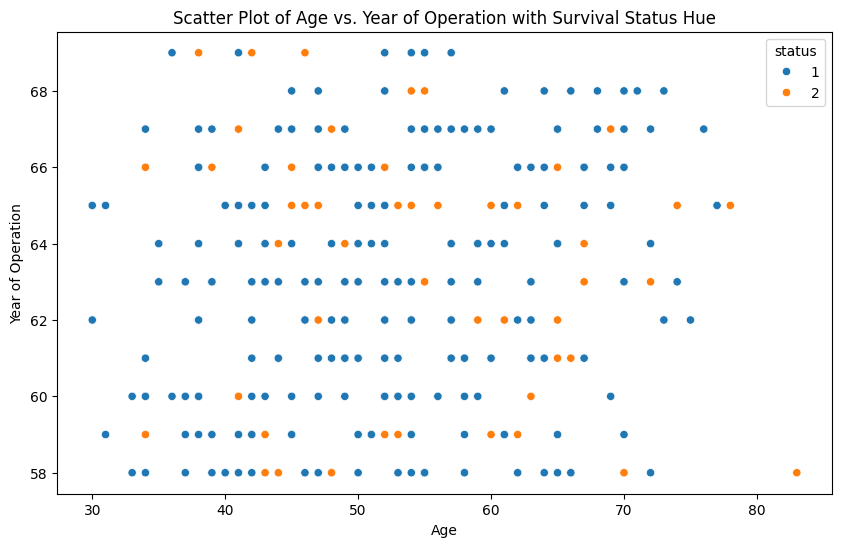

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="age",y="year",hue="status",data=df)
plt.title("Scatter Plot of Age vs. Year of Operation with Survival Status Hue")
plt.xlabel("Age")
plt.ylabel("Year of Operation")
plt.show()

##**Scatter Plot of Year of Operation vs.  Nodes with Survival Status Hue**

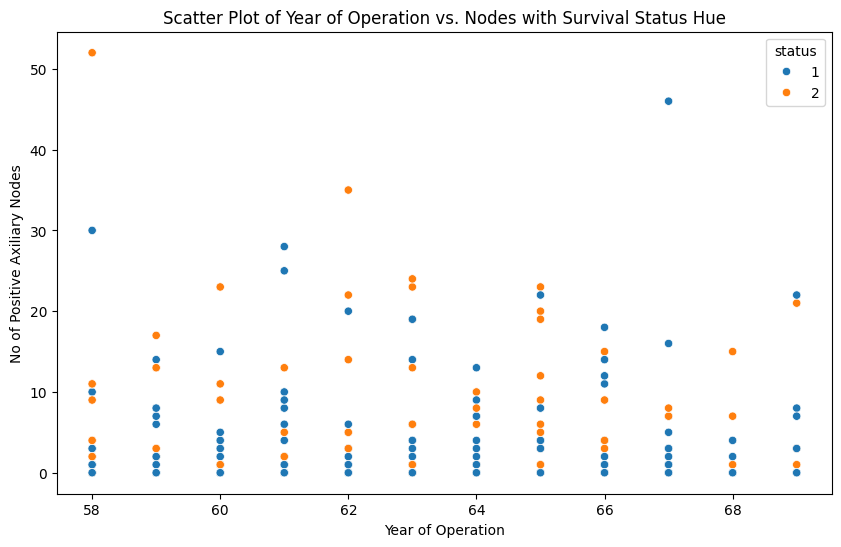

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="year",y="nodes",hue="status",data=df)
plt.title("Scatter Plot of Year of Operation vs. Nodes with Survival Status Hue")
plt.xlabel("Year of Operation")
plt.ylabel("No of Positive Axiliary Nodes")
plt.show()

#**Multivariate Analysis**

# HeatMap

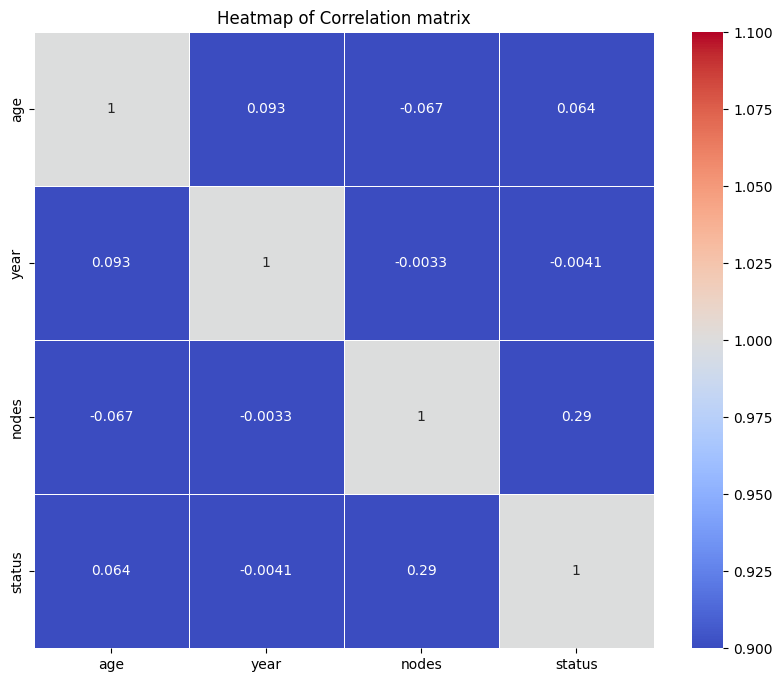

In [ ]:
# shows how variables are related to each other.(correlation between different variables)

import seaborn as sns
import matplotlib.pyplot as plt

#calculate the correlation matrix
corr_matrix = df.corr()

#create a heatmap

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",vmin=1,vmax=1,linewidth=0.5)
plt.title("Heatmap of Correlation")
plt.show()

# Contour Plot

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


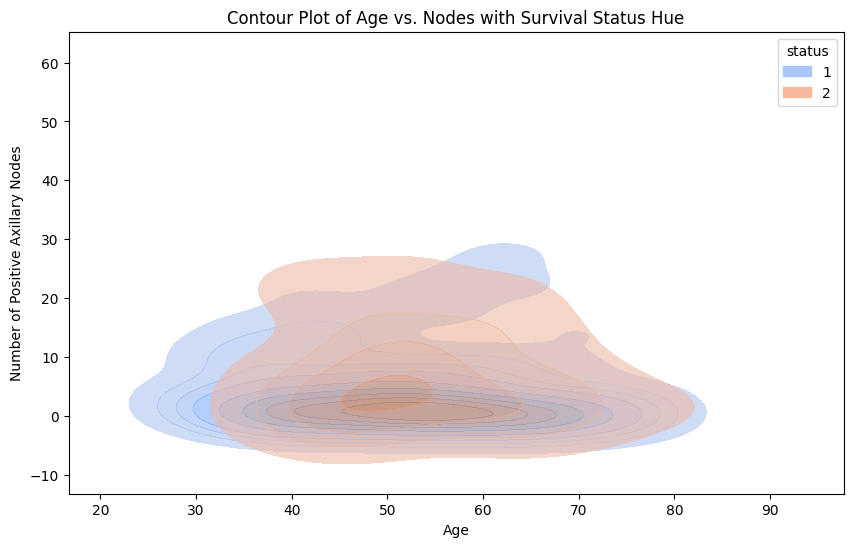

In [ ]:
#used to show the density of data points across two continuous variables
#They are particularly useful for visualizing the distribution and identifying clusters.

#create a contour plot for Age vs Nodes

plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df['age'],
    y=df['nodes'],
    hue=df['status'],
    fill=True,
    palette='coolwarm',
    alpha=0.6,
    linewidth=1.5
)
plt.title('Contour Plot of Age vs. Nodes with Survival Status Hue')
plt.xlabel('Age')
plt.ylabel('Number of Positive Axillary Nodes')
plt.show()